# 서울 부동산 시장 분석 및 투자 전략 수립

## 자유주제: 정부 부동산 정책 변화가 서울 부동산 시장에 미치는 영향 분석
2. 주요 정부 부동산 정책 날짜 체크
    - 날짜 기준으로 잘라서 앞뒤 따로 분석(그래프 등)
3. 실무 인사이트 도출

# 2020~2025 서울 아파트 매매 관련 주요 정부 정책 및 영향 분석
---
## 2020년
### 6·17 부동산 대책 (2020.06)
- 규제지역 확대: 서울 전역과 수도권 대부분이 규제지역으로 묶임
- 전매제한, 대출규제 강화
- **영향 분석**
  - 매수심리 위축 → 거래량 감소
  - 대출 규제로 실수요자 구매력 하락 → 단기적으로 가격 안정 효과
  - 하지만 풍선효과로 인근 비규제지역 상승

### 7·10 부동산 대책 (2020.07)
- 종부세, 양도세 강화
- 다주택자 규제 심화
- **영향 분석**
  - 다주택자 매물 증가 압력 → 공급 유도
  - 거래량 감소, 매수자 관망세 확대
  - 중장기적으로 매도자-매수자 간 눈치싸움 심화

---

## 2021년
### 2·4 공급대책 (2021.02)
- 2025년까지 전국 83만호 주택 공급 계획
- 서울 내 신규 택지 및 공공주도 개발 확대
- **영향 분석**
  - 공급 기대감으로 중장기적 가격 안정 신호
  - 하지만 실제 공급까지 시차 존재 → 단기적 효과는 제한적

---

## 2022년
### 새 정부 주택정책 기조 (윤석열 정부 출범, 2022.05~)
- 재건축·재개발 규제 완화 기조
- 세제 완화, 대출 규제 일부 완화
- **영향 분석**
  - 서울 주요 재건축 단지 매수세 회복 → 가격 반등 요인
  - 거래량 일시적 증가, 투자수요 재진입 가능성

---

## 2023년
### 1·3 부동산 대책 (2023.01)
- 규제지역 해제 확대: 서울 강남3구, 용산 제외 전역 해제
- 세제 완화, 실거주 요건 완화
- **영향 분석**
  - 거래량 회복, 매수심리 개선
  - 가격 하락세 둔화 및 일부 지역 반등
  - 변동성 확대 (투자수요·실수요 혼재)

---

## 2024년
### 재건축 안전진단 면제 정책 (2024.01)
- 30년 이상 된 아파트에 대해 안전진단 없이 재건축 착수 허용
- 1기 신도시 재정비 조기 착공 및 2030년 첫 입주 추진
- 소형 주택(60㎡ 이하) 취득세·양도세·종부세에서 주택 수 제외
- 공공주택 14만 호 이상 공급, 건설금융 지원 확대
- **영향 분석**
  - **거래량**: 재건축 추진 가속화로 거래 활발, 특히 소형 아파트 수요 증가
  - **매매가격/평단가**: 소형·재건축 가능 지역 상승, 도심 공급 확대 신호로 장기적 가격 안정
  - **변동성**: 초기 추진 지역 중심으로 상승 변동성 증가
  - **체감 강도**: 단기·중기 모두 시장 영향 높음, 실수요 및 투자심리 동시에 자극
  
### 주택공급 활성화 방안 (2024.08)
- 도심 내 고밀도 개발, 용적률 상향
- 청년·무주택자 공급 확대
- **영향 분석**
  - 장기적 공급 증가 신호 → 가격 상승 억제 기대
  - 단기적으로는 규제완화 기대감으로 특정 지역 매수세 증가

---

## 2025년
### 전세사기·주택시장 안정 대책 (2025.03)
- 전세사기 방지 대책 강화
- 공공 주도 임대주택 확충
- **영향 분석**
  - 임대시장 안정 → 매매시장 불안 완화
  - 실수요자 심리 개선 → 매매수요 점진적 회복 가능성


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df_sales = pd.read_csv('./data/sales_clean.csv')
df_sales['계약월'] = pd.to_datetime(df_sales['계약월'], format='%Y-%m-%d')
df_sales['계약월'] = df_sales['계약월'].dt.to_period('M')

In [5]:
# 데이터 전처리

def area(df):
    if df['전용면적'] >= 85:
        return '대형'
    elif df['전용면적'] >= 60:
        return '중형'
    else:
        return '소형'
    
df_sales['면적구분'] = df_sales.apply(area, axis=1)
df_sales['강남3구여부'] = df_sales['구'].apply(lambda x: '강남3구' if x in ['강남구', '서초구', '송파구'] else '기타')
df_sales = df_sales.sort_values('계약월').reset_index(drop=True)

In [6]:
# 월별 집계
from da_utils.calc_monthly_annual import calc_monthly_annual
monthly_stats, _ = calc_monthly_annual(df_sales)
monthly_stats['월별거래량변화율'] = monthly_stats['월별거래건수'].pct_change()
monthly_stats_district , _ = calc_monthly_annual(df_sales, '구')
monthly_stats_area, _ = calc_monthly_annual(df_sales, '면적구분')

# display(monthly_stats)
# display(monthly_stats_area, monthly_stats_district)

In [7]:
# 정책 이벤트 매핑
df_sales['정책이벤트'] = None

events = [
    {'정책명': '2020 하반기 규제 강화', '월': '2020-07'},
    {'정책명': '2·4 공급대책', '월': '2021-02'},
    {'정책명': '새 정부 주택정책 기조', '월': '2022-05'},
    {'정책명': '1·3 부동산 대책', '월': '2023-01'},
    {'정책명': '재건축 안전진단 면제', '월': '2024-01'},
    {'정책명': '주택공급 활성화 방안', '월': '2024-08'},
    {'정책명': '토지거래허가구역 해제', '월': '2025-01'},
    {'정책명': '주택시장 안정화 방안', '월': '2025-03'},
]

for event in events:
    for df in [df_sales, monthly_stats, monthly_stats_area, monthly_stats_district]:
        event_period = pd.Period(event['월'], freq='M')
        mask = df_sales['계약월'] == event_period
        df.loc[mask, '정책이벤트'] = event['정책명']

monthly_stats['계약월'] = monthly_stats['계약월'].astype(str)

In [8]:
def calc_event_change(df, event_month, event_window=3):
    event_idx = df.index[df['계약월'] == event_month].tolist()
    if not event_idx:
        return None
    idx = event_idx[0]
    
    # 이벤트 전/후 구간 설정
    start_pre = max(idx - event_window, 0)
    end_pre = idx - 1
    start_post = idx + 1
    end_post = min(idx + event_window, len(df) - 1)
    
    # 전후 평균 계산
    pre_avg = df.iloc[start_pre:end_pre+1].mean(numeric_only=True)
    post_avg = df.iloc[start_post:end_post+1].mean(numeric_only=True)
    
    change = post_avg - pre_avg
    change_pct = (change / pre_avg) * 100
    return {'pre_avg': pre_avg, 'post_avg': post_avg, 'change': change, 'change_pct': change_pct}


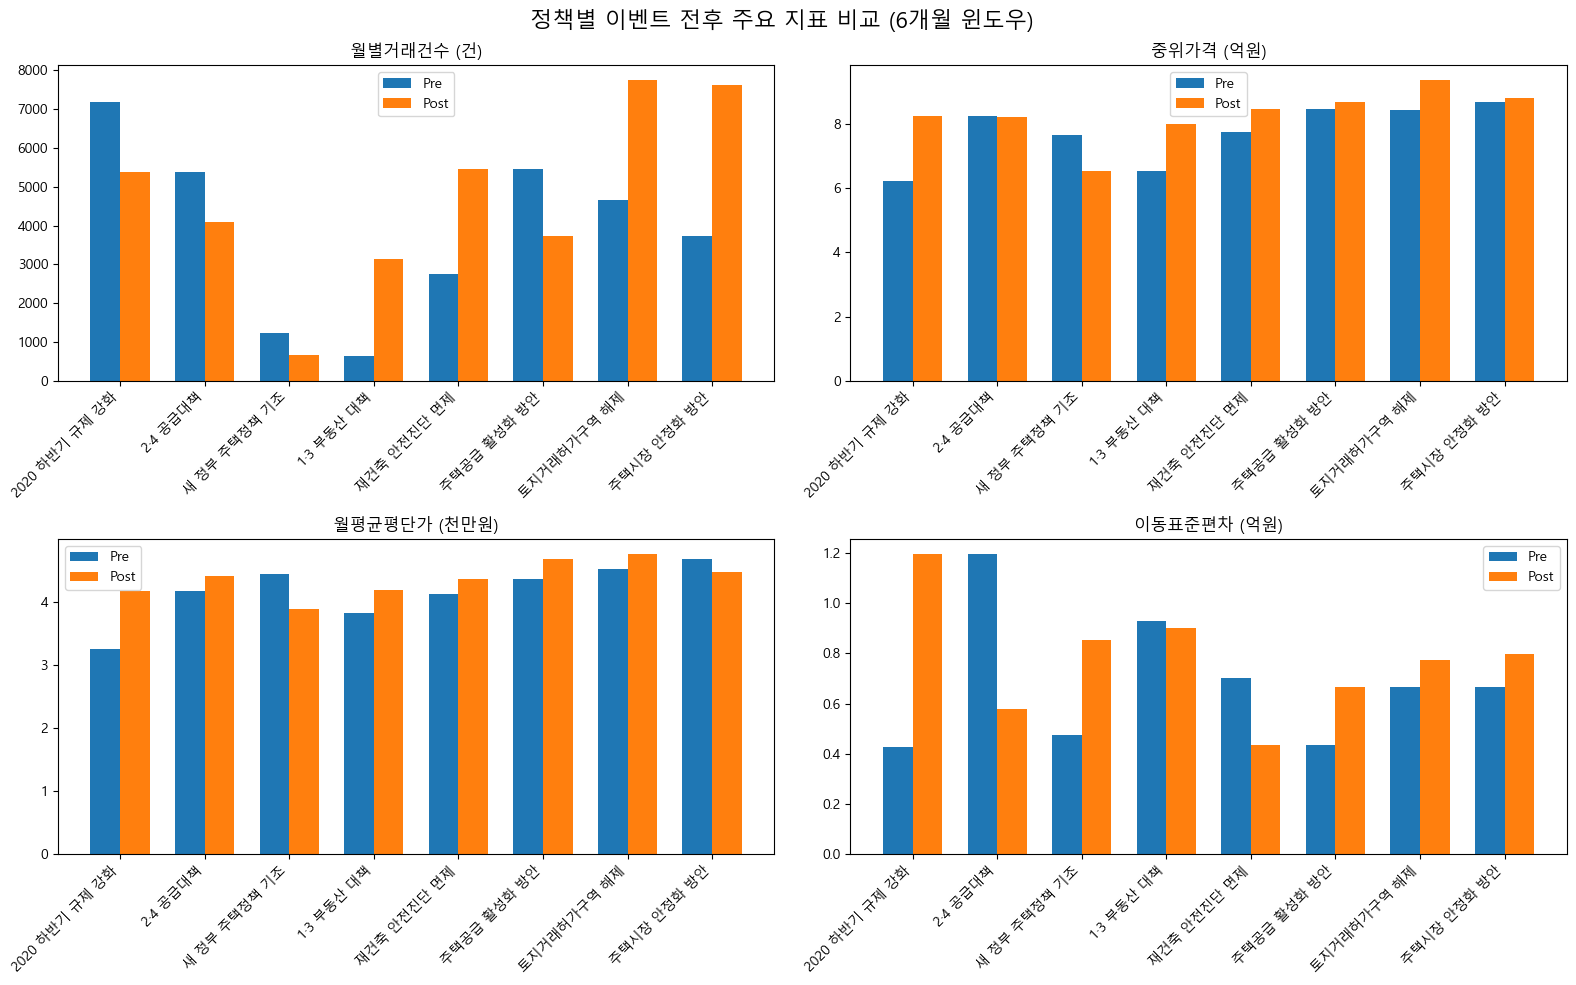

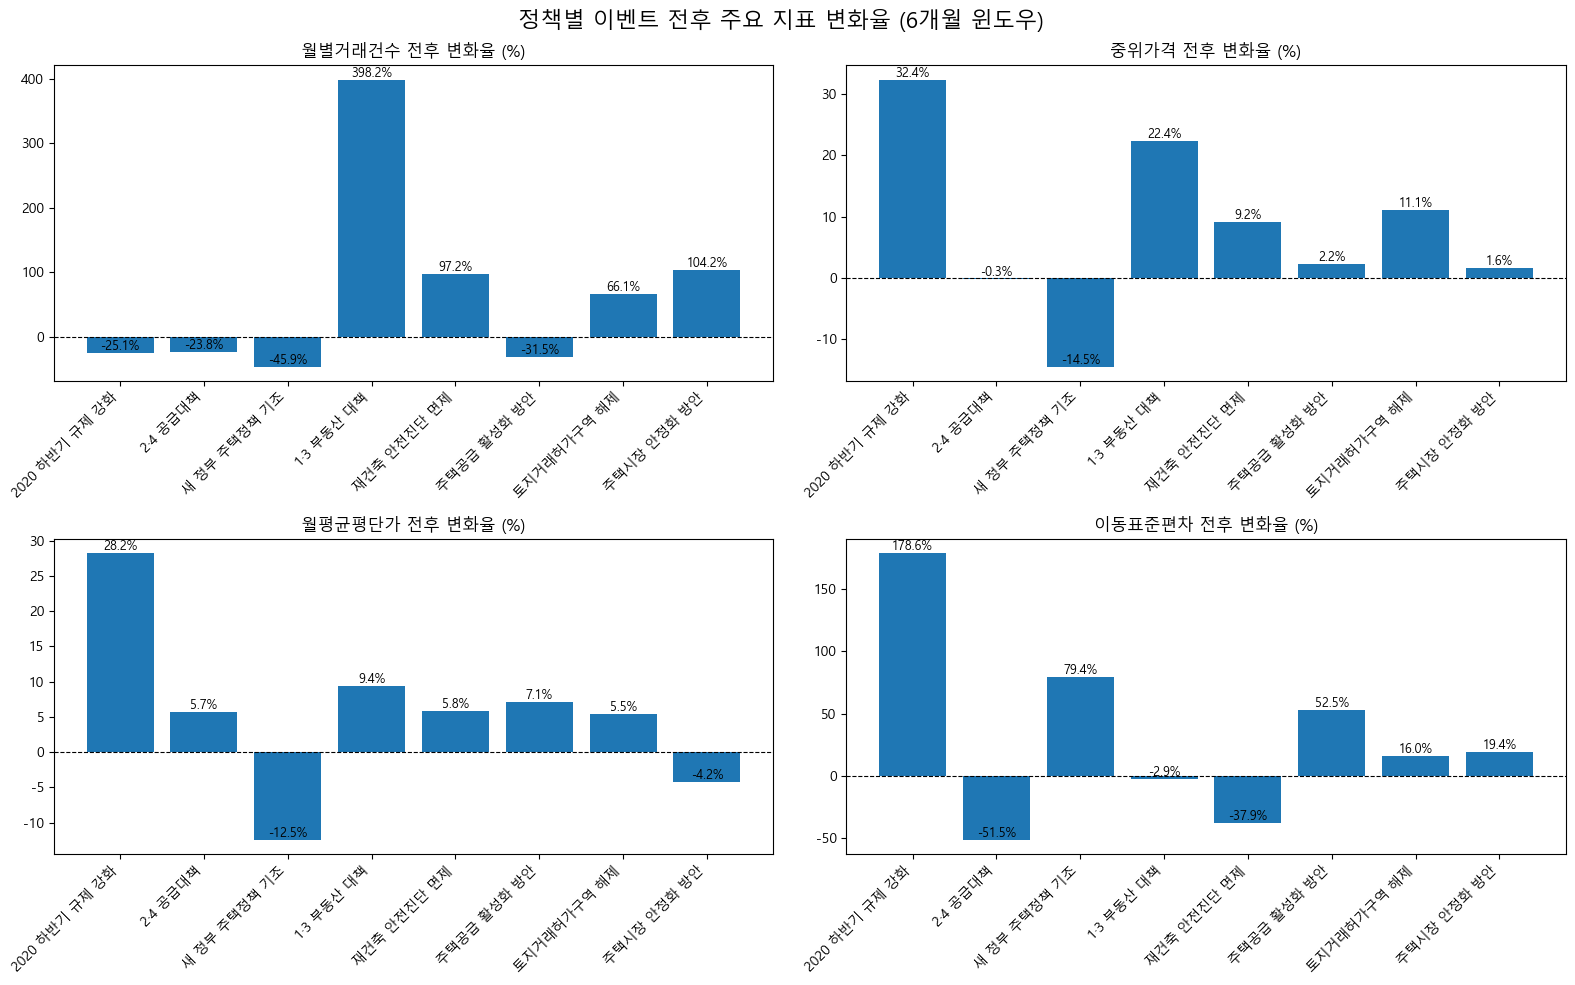

In [31]:
# 이벤트 윈도우, 정책 리스트, 지표 준비
window = 6
event_results = {}
for event in events:
    event_month = event['월']
    result = calc_event_change(monthly_stats, event_month, window)
    event_results[event['정책명']] = result

# 정책 리스트
policies = list(event_results.keys())

# 비교할 지표
metrics = ['월별거래건수', '중위가격', '월평균평단가', '이동표준편차']

# 데이터프레임 준비
plot_data = {}
for metric in metrics:
    pre_values = [event_results[p]['pre_avg'][metric] for p in policies]
    post_values = [event_results[p]['post_avg'][metric] for p in policies]
    plot_data[metric] = pd.DataFrame({
        'Policy': policies,
        'Pre': pre_values,
        'Post': post_values
    })

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# 지표별 제목과 단위 변환 설정
metric_configs = {
    '월별거래건수': {'title': '월별거래건수 (건)', 'scale': 1},
    '중위가격': {'title': '중위가격 (억원)', 'scale': 1e8},
    '월평균평단가': {'title': '월평균평단가 (천만원)', 'scale': 1e7},
    '이동표준편차': {'title': '이동표준편차 (억원)', 'scale': 1e8}
}

for i, metric in enumerate(metrics):
    df_plot = plot_data[metric].copy()
    config = metric_configs[metric]
    
    # 단위 변환
    df_plot['Pre'] = df_plot['Pre'] / config['scale']
    df_plot['Post'] = df_plot['Post'] / config['scale']
    
    width = 0.35
    x = range(len(df_plot))
    
    axes[i].bar([j - width/2 for j in x], df_plot['Pre'], width, label='Pre')
    axes[i].bar([j + width/2 for j in x], df_plot['Post'], width, label='Post')
    
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(df_plot['Policy'], rotation=45, ha='right')
    axes[i].set_title(config['title'])
    axes[i].legend()

fig.suptitle(f'정책별 이벤트 전후 주요 지표 비교 ({window}개월 윈도우)', fontsize=16)
plt.tight_layout()
# plt.savefig(f'fig/04-2_event_story/이벤트전후주요지표비교_{window}개월.png', dpi=300, bbox_inches='tight')
plt.show()

# 변화율 데이터프레임 준비
plot_data = {}
for metric in metrics:
    changes = [event_results[p]['change_pct'][metric] for p in policies]
    plot_data[metric] = pd.DataFrame({
        'Policy': policies,
        'Change_pct': changes
    })

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    df_plot = plot_data[metric]
    x = range(len(df_plot))
    
    bars = axes[i].bar(x, df_plot['Change_pct'])
    
    # 0 기준선 표시
    axes[i].axhline(0, color='black', linewidth=0.8, linestyle='--')
    
    # 레이블 설정
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(df_plot['Policy'], rotation=45, ha='right')
    axes[i].set_title(f'{metric} 전후 변화율 (%)')
    
    # 변화율 값 라벨 표시
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, height,
                     f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

fig.suptitle(f'정책별 이벤트 전후 주요 지표 변화율 ({window}개월 윈도우)', fontsize=16)
plt.tight_layout()
# plt.savefig(f'fig/04-2_event_story/이벤트전후변화율비교_{window}개월.png', dpi=300, bbox_inches='tight')
plt.show()

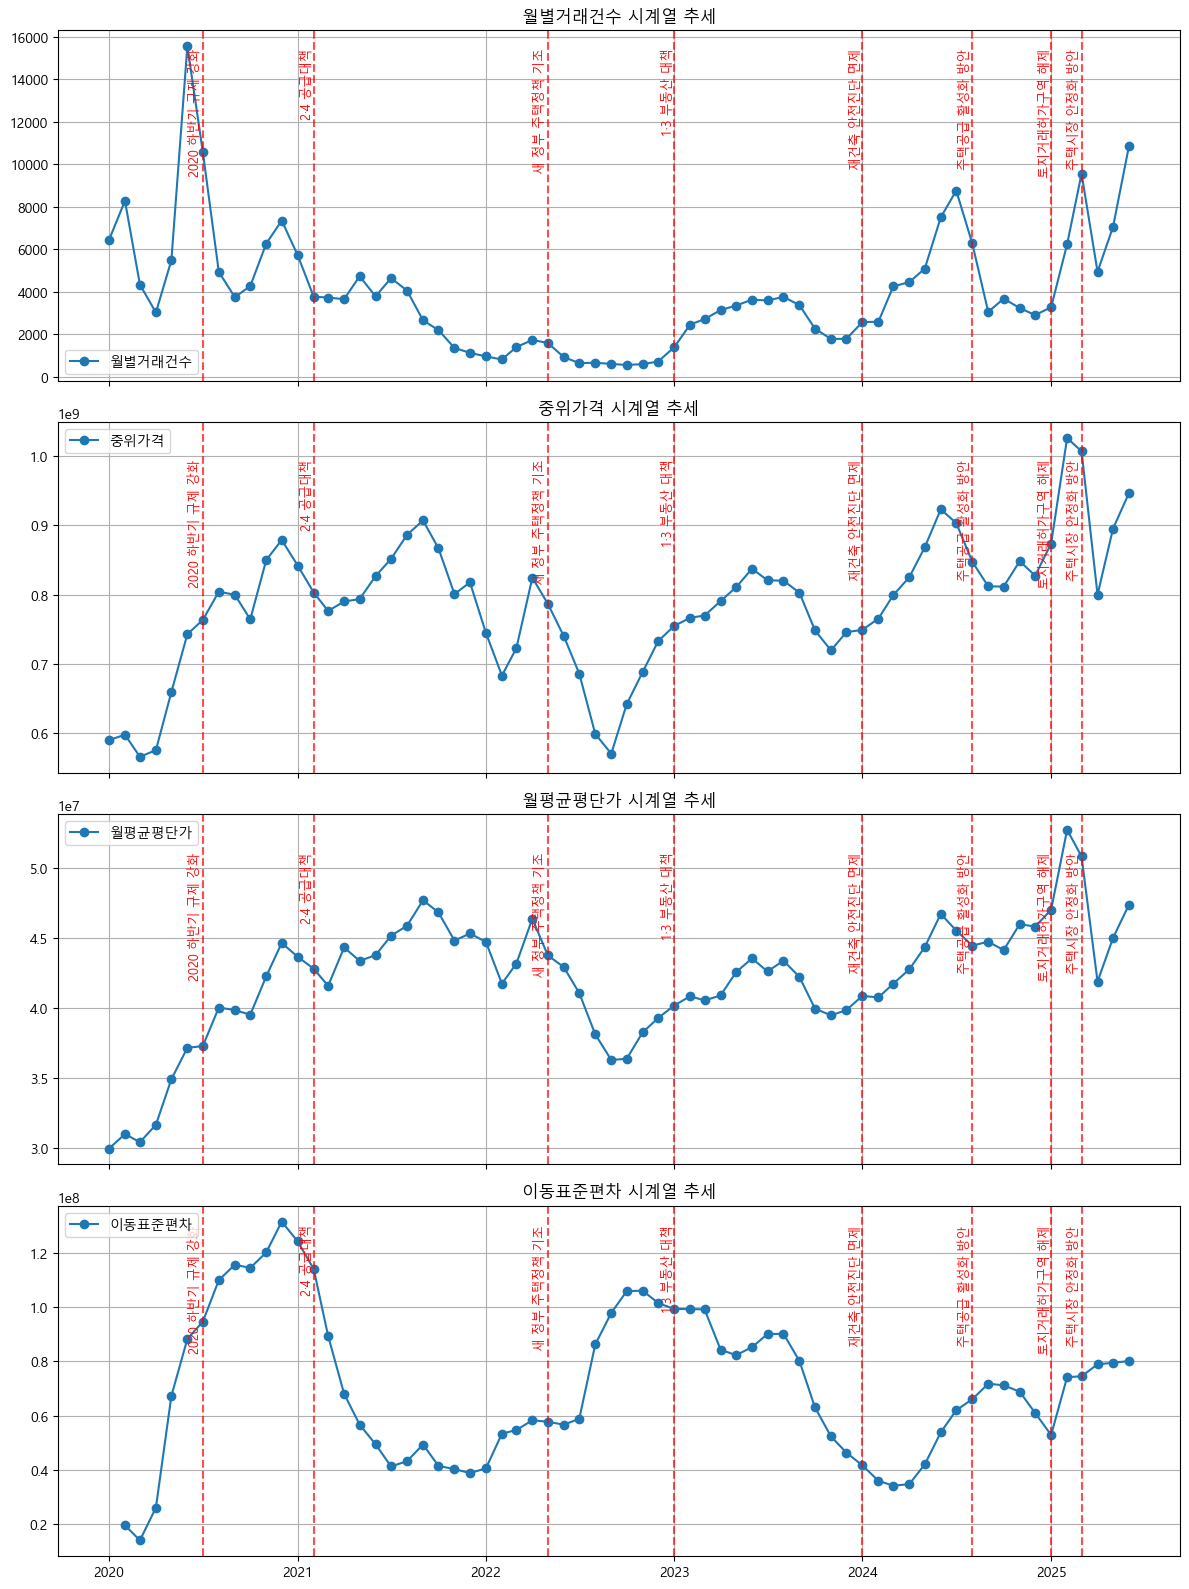

In [12]:
# 시계열 데이터와 이벤트 체크

# 비교할 지표
metrics = ['월별거래건수', '중위가격', '월평균평단가', '이동표준편차']

# 시계열 데이터로 변환
for ev in events:
    ev['월'] = pd.to_datetime(ev['월'], format='%Y-%m')
monthly_stats['계약월'] = pd.to_datetime(monthly_stats['계약월'], format='%Y-%m')

fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 16), sharex=True)

for i, var in enumerate(metrics):
    axes[i].plot(monthly_stats['계약월'], monthly_stats[var], marker='o', label=var)
    
    # 이벤트 시점 표시
    for ev in events:
        axes[i].axvline(pd.to_datetime(ev['월']), color='red', linestyle='--', alpha=0.7)
        axes[i].text(pd.to_datetime(ev['월']), 
                     axes[i].get_ylim()[1]*0.95,  # y축 상단 근처
                     ev['정책명'], rotation=90, va='top', ha='right', fontsize=9, color='red')
    
    axes[i].set_title(f"{var} 시계열 추세")
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.savefig(f'fig/04-2_event_story/이벤트시계열분석.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
# 3
window = 3
event_results_3 = {}
for event in events:
    event_month = event['월']
    result = calc_event_change(monthly_stats, event_month, window)
    event_results_3[event['정책명']] = result

# 정책 리스트
policies = list(event_results_3.keys())

# 데이터프레임 준비
plot_data = {}
for metric in metrics:
    pre_values = [event_results_3[p]['pre_avg'][metric] for p in policies]
    post_values = [event_results_3[p]['post_avg'][metric] for p in policies]
    plot_data[metric] = pd.DataFrame({
        'Policy': policies,
        'Pre': pre_values,
        'Post': post_values
    })

# 6
window = 6
event_results_6 = {}
for event in events:
    event_month = event['월']
    result = calc_event_change(monthly_stats, event_month, window)
    event_results_6[event['정책명']] = result

# 정책 리스트
policies = list(event_results_6.keys())

# 데이터프레임 준비
plot_data = {}
for metric in metrics:
    pre_values = [event_results_6[p]['pre_avg'][metric] for p in policies]
    post_values = [event_results_6[p]['post_avg'][metric] for p in policies]
    plot_data[metric] = pd.DataFrame({
        'Policy': policies,
        'Pre': pre_values,
        'Post': post_values
    })

# 12
window = 12
event_results_12 = {}
for event in events:
    event_month = event['월']
    result = calc_event_change(monthly_stats, event_month, window)
    event_results_12[event['정책명']] = result

# 정책 리스트
policies = list(event_results_12.keys())

# 데이터프레임 준비
plot_data = {}
for metric in metrics:
    pre_values = [event_results_12[p]['pre_avg'][metric] for p in policies]
    post_values = [event_results_12[p]['post_avg'][metric] for p in policies]
    plot_data[metric] = pd.DataFrame({
        'Policy': policies,
        'Pre': pre_values,
        'Post': post_values
    })

periods = {'단기(3개월)': event_results_3,
           '중기(6개월)': event_results_6,
           '장기(12개월)': event_results_12}

results = []

for period, data in periods.items():
    for policy, stats in data.items():
        change_pct = stats['change_pct']
        results.append({
            '정책명': policy,
            '기간': period,
            '거래량': change_pct['월별거래건수'],
            '거래가격': change_pct['월평균거래금액'],
            '평단가': change_pct['월평균평단가'],
            '변동성': change_pct['이동표준편차']
        })

policy_order = [
    '2020 하반기 규제 강화',
    '2·4 공급대책',
    '새 정부 주택정책 기조',
    '1·3 부동산 대책',
    '재건축 안전진단 면제',
    '주택공급 활성화 방안',
    '토지거래허가구역 해제',
    '주택시장 안정화 방안'
]
period_order = ['단기(3개월)', '중기(6개월)', '장기(12개월)']

df_effect = pd.DataFrame(results)
df_effect['정책명'] = pd.Categorical(df_effect['정책명'], categories=policy_order, ordered=True)
df_effect['기간'] = pd.Categorical(df_effect['기간'], categories=period_order, ordered=True)
df_effect = df_effect.sort_values(['정책명', '기간']).reset_index(drop=True)
df_effect.to_csv('./data/04-2_event_story/정책별효과정리.csv')
display(df_effect)

,정책명,기간,거래량,거래가격,평단가,변동성
0,2020 하반기 규제 강화,단기(3개월),-46.160236,15.691075,15.160940,87.733910
1,2020 하반기 규제 강화,중기(6개월),-25.089240,31.275328,28.218447,178.599969
2,2020 하반기 규제 강화,장기(12개월),-34.343563,32.642896,31.056166,120.644223
3,2·4 공급대책,단기(3개월),-37.365022,-2.384506,-0.997838,-43.153457
4,2·4 공급대책,중기(6개월),-23.816449,2.865485,5.658990,-51.526052
5,2·4 공급대책,장기(12개월),-57.608723,14.808550,18.353380,-40.498060
6,새 정부 주택정책 기조,단기(3개월),-43.345142,-6.116869,-7.017200,21.401275
7,새 정부 주택정책 기조,중기(6개월),-45.948136,-13.715576,-12.473107,79.372822
8,새 정부 주택정책 기조,장기(12개월),-39.682647,-12.010615,-11.444439,90.469761
9,1·3 부동산 대책,단기(3개월),343.260522,12.574858,7.354806,-9.823243


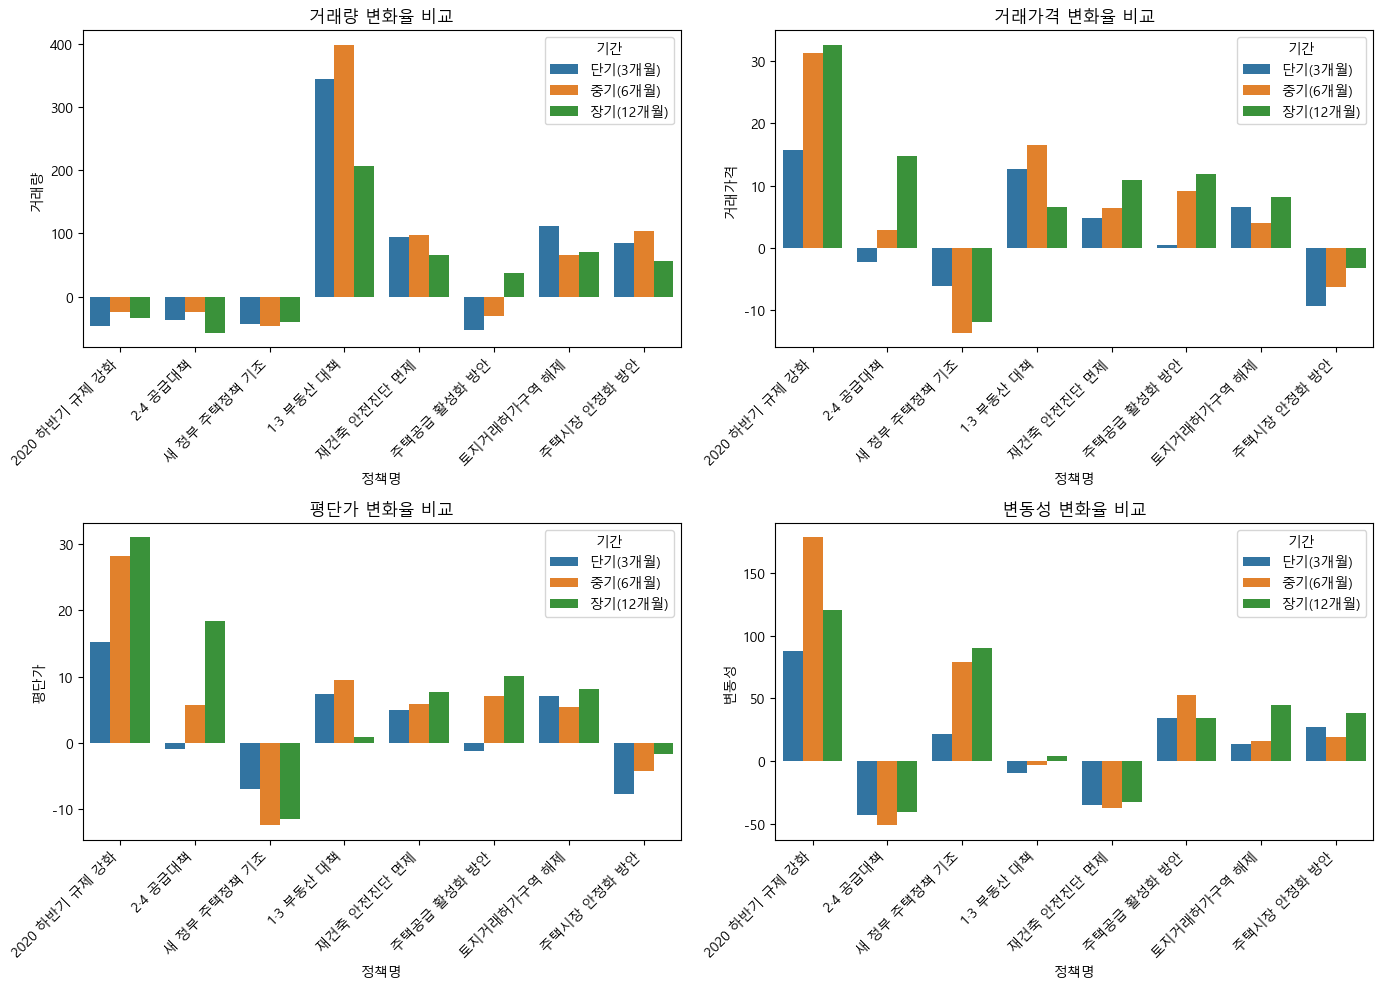

In [30]:
fig, axes = plt.subplots(2,2, figsize=(14,10))
metrics = ['거래량','거래가격','평단가','변동성']

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(data=df_effect, x='정책명', y=metric, hue='기간', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f"{metric} 변화율 비교")

plt.tight_layout()
plt.savefig(f'fig/04-2_event_story/정책효과분석.png', dpi=300, bbox_inches='tight')
plt.show()